In [4]:
import os
import random
import re
from jieba import posseg as psg
import jieba
import numpy as np
import pandas as pd
import pyecharts
import collections


with open('merge.csv','r')as f:
    comment = f.read()
comment_list = comment.split('\n')
print('>>>累计评论数：%s\n'%len(comment_list))



data1 = []
temp = ['','','','','','','']
for comment in  comment_list:
    comment = comment.split(',')
    if len(comment) == 1:
        temp[6] = comment[0]
        comment = temp
        data1.append(comment)
    elif len(comment)!=7:
        pass
    else:
        data1.append(comment)
data1 = pd.DataFrame(data1,columns=['序号','昵称','性别','时间','内容','点赞','回复'])
string = ''.join(data1['内容'])
word_list = []
stop_words = ['就是','这是','但是','虽然','觉得','还是','弹幕','没有','(',')',]
words = psg.cut(string)#分词
#去除停用词
for x in words:
    if x.flag == 'x' :
        pass
    elif len(x.word) == 1:
        pass
    elif x.word in stop_words:
        pass
    else:
        word_list.append(x.word)
#word_list = [word for word in words if word not in stop_words 
c = collections.Counter(word_list)

attr = []#属性
value = []#值
for x in c.most_common(20):
    attr.append(x[0])
    value.append(x[1])


Bar = pyecharts.Bar("评论中出现频率最高的20个词", "统计时间：2019-03-22")
Bar.add("出现次数", attr, value,mark_point=['max'],is_legend_show = True)
Bar

>>>累计评论数：12147



In [5]:
import imageio
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
back_color = imageio.imread('下载.jpg')
words = ' '.join(word_list)
for word in words:
    word = str(word)
    # 正则表达式获取必要数据
    word = re.search('<p>(.*?)</p>',word)

In [6]:
wc = WordCloud(background_color='white',
              max_words=5000,
              mask=back_color,
              max_font_size=200,
              font_path='C:\\Windows\\Fonts\\msyhbd.ttc',  
              random_state=None
              )
wc.generate(words)

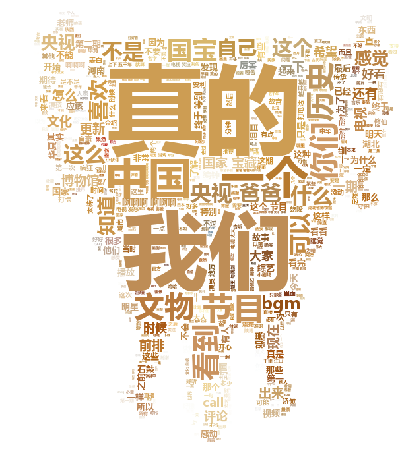

In [7]:
image_colors = ImageColorGenerator(back_color)
plt.figure(figsize = (15,8))
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.show()
wc.to_file('comment.png')

## 情感分析

In [8]:
import numpy as np
import matplotlib as plt
plt.style.use('ggplot')

In [9]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False 
import jieba
from snownlp import SnowNLP

In [ ]:
from wordcloud import WordCloud

### 测试

In [13]:

test = '梁家辉先生的赤诚之心真是令人感动qaq'
c = SnowNLP(test)
c.sentiments

0.9584870320165176

  得分在 [0, 1] 区间内，越接近 1 则情感越积极，反之则越消极。一般来说，得分大于 0.5 的归于正向情感，小于的归于负向。下面为 comment 增加两列，分别是评论内容的情感得分和正负向标签（1=正向，-1=负向）。



In [17]:
data1['内容']

0                                                央视爸爸就是不一样
1                                     弹幕清地漂亮。风气差，唉[小电视_发愁]
2                                                   好棒的节目！
3                                           俺想问一下cctv三几点演吖
4        二刷要被弹幕ky气死，说不能请明星的，说不能穿西装的，您怎么不直接喷主持人嘉宾说的普通话没用...
5        台词有个问题啊：在明朝以前，朝代都不会主动加上“大”这个字。大宋...一听就是现代人的提法。...
6          我看见过一个故事内容大概是王希孟在画完《千里江山图》后又画了《千里浮尸图》然后被宋徽宗下令处死
7                                       加油！新一代的中国！新一代的中国人！
8                                   第二季开播之前再来看一遍  祝福中国越来越好
9                                                       致敬
10                                             山东中医药大学发来慰问
11                                                    祖国真棒
12                                第一眼看着名字以为是给小偷大盗看的[小电视_笑]
13                                             荀彧bgm是哪一集的？
14                                我觉得应该把那几个cctv去掉。[小电视_害羞]
15                                       央视爸爸出品，必属精品。(???)
16                                             我又回来啦哈哈再看